# Exercise 2.3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [96]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [97]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [98]:
#df = pd.read_csv('new_york_citibike_2022_data.csv', index_col = 0)
df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)

C:\Users\canam\AppData\Local\Temp\ipykernel_5352\1248129452.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)


In [99]:
#checking shape of dataframe to make sure 
#it matches what was exported in previous exercise
df.shape

(1491908, 16)

In [100]:
#checking the columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'daily_bike_rides', '_merge'],
      dtype='object')

In [101]:
#dropping the _merge column
df = df.drop(['_merge', 'daily_bike_rides'], axis=1)

In [102]:
#checking to see if column was dropped
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [103]:
#checking shape of dataframe
df.shape

(1491908, 14)

In [104]:
#checking data types 
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
dtype: object

In [105]:
#changing date format to datetime format
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])

In [106]:
#checking to see that it has been changed
df.dtypes

date                  datetime64[ns]
ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
dtype: object

## Plotting with pandas

In [108]:
#creating dataframe with date as the index
df_temp = df.set_index('date')

In [109]:
#checking to see if date is now the index
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,4358B9E87D6D7A16,classic_bike,2022-01-01 14:54:02.879,2022-01-01 15:03:11.662,35 St & 21 Ave,7170.04,31 St & 21 Ave,7202.07,40.776745,-73.906558,40.778130,-73.908420,member,11.6
2022-01-01,38B902A7913496FB,classic_bike,2022-01-01 14:16:55.828,2022-01-01 14:36:57.086,E 32 St & Park Ave,6280.12,Bleecker St & Crosby St,5679.08,40.745712,-73.981948,40.726156,-73.995102,member,11.6
2022-01-01,43DD38318BC7164E,classic_bike,2022-01-01 15:02:57.752,2022-01-01 15:05:15.432,Front St & Washington St,4936.01,Cadman Plaza E & Red Cross Pl,4821.06,40.702551,-73.989402,40.699918,-73.989718,member,11.6
2022-01-01,A74287183A50FD7B,classic_bike,2022-01-01 06:09:55.182,2022-01-01 06:13:50.673,Bergen Ave & E 152 St,7858.02,Willis Ave & E 141 St,7759.08,40.817166,-73.914737,40.810930,-73.921606,member,11.6
2022-01-01,111FDEBA5E422B14,classic_bike,2022-01-01 15:22:00.906,2022-01-01 15:27:44.046,Lexington Ave & E 29 St,6164.09,Lexington Ave & E 29 St,6164.09,40.743116,-73.982154,40.743116,-73.982154,casual,11.6


In [110]:
df_temp = df_temp.sort_index()

<Axes: xlabel='date'>

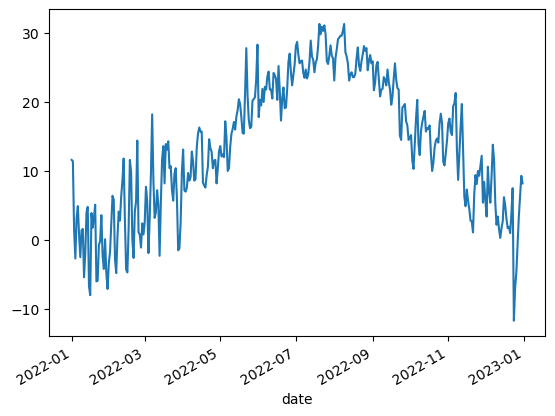

In [111]:
df_temp['avgTemp'].plot()

## Aggregate trips 

In [113]:
df.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [114]:
# grouping by the count of the trips
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [115]:
df_group.head()

,date,ride_id
0,2022-01-01,1028
1,2022-01-02,2120
2,2022-01-03,1668
3,2022-01-04,1844
4,2022-01-05,1717


In [116]:
#renaming ride_id column
df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)

In [117]:
df_group.head()

,date,daily_bike_rides
0,2022-01-01,1028
1,2022-01-02,2120
2,2022-01-03,1668
3,2022-01-04,1844
4,2022-01-05,1717


In [157]:
#creating a subsample of weather data because it is too large
df_subsample = df.sample(frac=.1)

In [158]:
#merging subsample of weather data with daily_bike_rides_data
df_2 = df_subsample.merge(df_group, on = "date", how = 'outer', indicator = True)
#checking to see if merge was successful
print(df_2['_merge'].value_counts(dropna = False))

_merge
both          149191
left_only          0
right_only         0
Name: count, dtype: int64


In [159]:
df_temp = df_2.drop(columns=['start_station_id', 'end_station_id', '_merge'])

In [160]:
df_temp.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides
0,2022-01-01,69E36EE94F201D31,electric_bike,2022-01-01 16:15:45.492,2022-01-01 16:33:09.229,E 58 St & 3 Ave,W 87 St & Amsterdam Ave,40.760958,-73.967245,40.788390,-73.974700,member,11.6,1028
1,2022-01-01,12E108C5D4E30944,electric_bike,2022-01-01 17:18:32.640,2022-01-01 17:20:12.257,Marcus Garvey Blvd & Macon St,Albany Ave & Fulton St,40.682601,-73.938037,40.680011,-73.938475,member,11.6,1028
2,2022-01-01,2095EF3D254EB940,classic_bike,2022-01-01 18:21:43.082,2022-01-01 18:29:56.749,W 21 St & 6 Ave,8 Ave & W 27 St,40.741740,-73.994156,40.747968,-73.996637,member,11.6,1028
3,2022-01-01,10822F0E35739F43,classic_bike,2022-01-01 09:21:09.002,2022-01-01 09:24:39.216,W 70 St & Amsterdam Ave,West End Ave & W 60 St,40.777480,-73.982886,40.772370,-73.990050,member,11.6,1028
4,2022-01-01,A8F8740F4C893FC8,classic_bike,2022-01-01 17:06:59.480,2022-01-01 17:34:11.478,Washington Pl & 6 Ave,E 2 St & Avenue A,40.732241,-74.000264,40.723077,-73.985836,member,11.6,1028


In [161]:
import os

In [162]:
path = r'C:\Users\canam\OneDrive\Desktop\Career Foundry\Specialization\Achievement 2'

In [163]:
df_temp.to_csv(os.path.join(path, 'New_York_Citibike_2022','weather_and_daily_bike_rides_data_smallest_subset.csv'))

## Plotting bike trips and temperatures on a dual axis

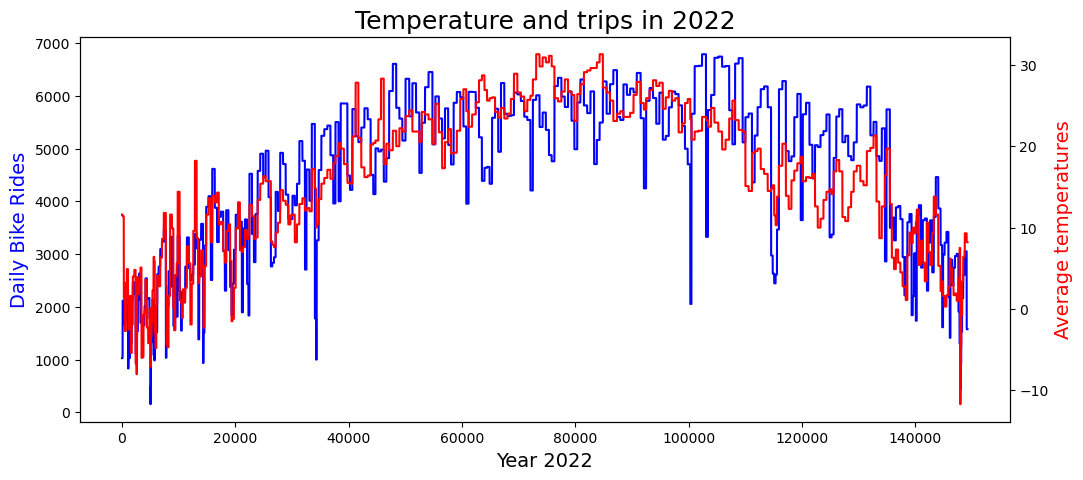

In [165]:
# Creating figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(12, 5))

# Making a plot of the bike rides
ax.plot(df_temp['daily_bike_rides'],color = "blue")
ax.set_xlabel("Year 2022", fontsize = 14) # setting x-axis label
ax.set_ylabel("Daily Bike Rides",color = "blue", fontsize = 14) # setting y-axis label

#creating the dual axis - initializing a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Making a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

I used the object-oriented approach to make this chart.  First, I created the objects fig (figure/container) and ax (axes) as subplots to the chart.  Then I defined the first plot (daily_bike_rides), set the x-axis to "Year 2022", and set the y-axis to "Daily Bike Rides."  The next step was to define the second plot (avgTemp) but because daily_bike_rides and avgTemp have different scales, I needed to first create a twin axis.  This would put avg_Temp on the same chart as the daily_bike_rides but with its own scale on the other y-axis.  After I created the twin axis, I defined the second plot (avgTemp) and all that was left to do was label the other y-axis to "Average Temperatures" and create a title for the chart.         